## 1、demo实例

In [1]:
import pandas as pd
import numpy as np

text1 = "我喜欢的水果是橙子和苹果"
text2 = "相比苹果我更加喜欢国产的华为"

In [2]:
import spacy

nlp = spacy.load('zh_core_web_sm')

In [3]:
doc = nlp(text1)

In [4]:
doc

我喜欢的水果是橙子和苹果

In [6]:
emd_dim = 10

In [7]:
dics = {}
for token in doc:
    dics[token.text] = token.vector[:emd_dim]

In [8]:
dics

{'我': array([-1.3247752 , -1.6688755 ,  0.749357  ,  0.85941577, -0.22634244,
        -1.6708682 ,  0.03403366,  1.3765073 ,  0.6426276 ,  1.5576223 ],
       dtype=float32),
 '喜欢': array([-1.3703265 , -0.602875  ,  0.27408972, -0.38036662, -0.49761173,
         0.2031984 , -0.12960458,  0.06462534, -0.42095014, -1.2041767 ],
       dtype=float32),
 '的': array([ 0.3415377 ,  0.6000297 , -1.7239015 , -0.72851676,  1.158524  ,
        -0.8583722 ,  1.2634337 ,  1.0109317 , -1.2898558 , -0.7436571 ],
       dtype=float32),
 '水果': array([-0.55852985, -0.20032012, -0.02420026, -0.04010248, -1.3015743 ,
        -1.3204076 , -0.7861524 ,  0.6362343 , -0.4448657 , -0.212     ],
       dtype=float32),
 '是': array([-0.6271794 , -1.6988527 ,  0.14448899,  2.466194  , -0.0993486 ,
        -0.3760319 ,  2.6196754 ,  0.55159503, -0.42107442,  1.0068394 ],
       dtype=float32),
 '橙子': array([ 1.0784352 , -0.7324965 ,  0.591076  , -0.20984882, -0.07178144,
         1.7195933 , -0.29536748, -0.1544032

In [9]:
X = pd.DataFrame(dics)

In [10]:
X.T

,0,1,2,3,4,5,6,7,8,9
我,-1.324775,-1.668875,0.749357,0.859416,-0.226342,-1.670868,0.034034,1.376507,0.642628,1.557622
喜欢,-1.370327,-0.602875,0.274090,-0.380367,-0.497612,0.203198,-0.129605,0.064625,-0.420950,-1.204177
的,0.341538,0.600030,-1.723902,-0.728517,1.158524,-0.858372,1.263434,1.010932,-1.289856,-0.743657
水果,-0.558530,-0.200320,-0.024200,-0.040102,-1.301574,-1.320408,-0.786152,0.636234,-0.444866,-0.212000
是,-0.627179,-1.698853,0.144489,2.466194,-0.099349,-0.376032,2.619675,0.551595,-0.421074,1.006839
橙子,1.078435,-0.732497,0.591076,-0.209849,-0.071781,1.719593,-0.295367,-0.154403,0.773509,-1.587893
和,0.322416,2.647843,2.612501,0.236240,0.500240,0.762496,3.632153,1.523306,0.669406,2.868554
苹果,0.628400,-0.493155,1.145407,-0.822133,-0.707903,-0.963297,0.743129,0.423888,-0.995425,0.157017


## 2、初始化$W_q$,$W_k$,$W_v$

为了创建查询矩阵、键矩阵和值矩阵，我们需要先创建另外三个权重矩阵，分别为$W^Q 、W^K、W^V$。用矩阵X分别乘以矩阵$W^Q 、W^K、W^V$，就可以依次创建出查询矩阵Q、键矩阵K和值矩阵V。

In [11]:
d_k = 6       # QKV向量的维度

$$Attention(Q,K,V) = softmax(\frac{QK^{T}}{\sqrt{d_k}})V$$

In [12]:
Wq = np.random.randn(emd_dim, d_k)

In [13]:
Wq

array([[ 0.13797538,  1.04144335,  1.04222528,  0.62979378, -0.58131155,
         1.05015373],
       [ 0.27387815,  1.83393001,  0.40011197,  0.16514612, -0.44097925,
         0.82901589],
       [-1.6238738 ,  0.05540837,  0.25906939, -1.46998954, -0.60043821,
        -1.11672617],
       [ 0.81522051, -0.34489853,  0.02954844, -0.73244157,  0.44346682,
         1.49666937],
       [ 1.87337672,  0.18786824, -0.39886001, -0.20593434, -0.57045607,
        -0.06816688],
       [ 1.40545753,  1.42420144, -0.73139838,  0.69430717,  0.32062638,
        -1.06960528],
       [-0.94415975,  0.42989508,  0.20613767, -0.59800231,  0.20527247,
         1.67918339],
       [-0.12848963, -0.919567  ,  0.96145562,  0.98650265, -0.90644455,
         0.23884895],
       [ 0.98839252,  0.72968816,  1.04383437,  0.04501477,  0.77956039,
        -0.03529453],
       [-0.54925928, -1.45619382, -0.0625861 , -0.17988502, -0.06816569,
         1.53145329]])

In [14]:
Wk = np.random.randn(emd_dim, d_k)
Wv = np.random.randn(emd_dim, d_k)

## 3、计算得到QKV矩阵

In [15]:
X.T.shape

(8, 10)

In [16]:
Wq

array([[ 0.13797538,  1.04144335,  1.04222528,  0.62979378, -0.58131155,
         1.05015373],
       [ 0.27387815,  1.83393001,  0.40011197,  0.16514612, -0.44097925,
         0.82901589],
       [-1.6238738 ,  0.05540837,  0.25906939, -1.46998954, -0.60043821,
        -1.11672617],
       [ 0.81522051, -0.34489853,  0.02954844, -0.73244157,  0.44346682,
         1.49666937],
       [ 1.87337672,  0.18786824, -0.39886001, -0.20593434, -0.57045607,
        -0.06816688],
       [ 1.40545753,  1.42420144, -0.73139838,  0.69430717,  0.32062638,
        -1.06960528],
       [-0.94415975,  0.42989508,  0.20613767, -0.59800231,  0.20527247,
         1.67918339],
       [-0.12848963, -0.919567  ,  0.96145562,  0.98650265, -0.90644455,
         0.23884895],
       [ 0.98839252,  0.72968816,  1.04383437,  0.04501477,  0.77956039,
        -0.03529453],
       [-0.54925928, -1.45619382, -0.0625861 , -0.17988502, -0.06816569,
         1.53145329]])

In [19]:
np.dot(X.T, Wq)

array([[ -4.3578319 , -10.16778711,   1.38720534,  -2.86813564,
          0.18466968,   2.22596191],
       [ -1.39657793,  -0.85925462,  -1.88839849,  -0.50441957,
          0.7469484 ,  -5.02911139],
       [  1.19170102,   0.36224621,   0.22617883,   2.86481096,
         -2.29905501,   3.79967056],
       [ -4.0821918 ,  -4.00053409,   0.81372858,   0.14725437,
         -0.34153812,  -0.7616636 ],
       [ -3.00403717,  -6.3199884 ,  -0.34063148,  -4.15740709,
          1.69764422,   7.95914208],
       [  3.03502767,   5.21217851,   0.44620132,   1.3965262 ,
          0.63100277,  -5.27520566],
       [ -5.81032489,   2.90689042,   4.05458119,  -4.10182137,
         -3.1687443 ,   9.95246522],
       [ -7.08482921,  -2.43319377,   1.22882346,  -1.38957435,
         -2.12357538,   0.44481274]])

In [20]:
X.T @  Wq

,0,1,2,3,4,5
我,-4.357832,-10.167787,1.387205,-2.868136,0.184670,2.225962
喜欢,-1.396578,-0.859255,-1.888398,-0.504420,0.746948,-5.029111
的,1.191701,0.362246,0.226179,2.864811,-2.299055,3.799671
水果,-4.082192,-4.000534,0.813729,0.147254,-0.341538,-0.761664
是,-3.004037,-6.319988,-0.340631,-4.157407,1.697644,7.959142
橙子,3.035028,5.212179,0.446201,1.396526,0.631003,-5.275206
和,-5.810325,2.906890,4.054581,-4.101821,-3.168744,9.952465
苹果,-7.084829,-2.433194,1.228823,-1.389574,-2.123575,0.444813


In [21]:
Q = X.T @  Wq

In [22]:
Q

,0,1,2,3,4,5
我,-4.357832,-10.167787,1.387205,-2.868136,0.184670,2.225962
喜欢,-1.396578,-0.859255,-1.888398,-0.504420,0.746948,-5.029111
的,1.191701,0.362246,0.226179,2.864811,-2.299055,3.799671
水果,-4.082192,-4.000534,0.813729,0.147254,-0.341538,-0.761664
是,-3.004037,-6.319988,-0.340631,-4.157407,1.697644,7.959142
橙子,3.035028,5.212179,0.446201,1.396526,0.631003,-5.275206
和,-5.810325,2.906890,4.054581,-4.101821,-3.168744,9.952465
苹果,-7.084829,-2.433194,1.228823,-1.389574,-2.123575,0.444813


In [23]:
K =  X.T @  Wk
V =  X.T @  Wv

## 4、相似矩阵

In [24]:
Q@K.T

,我,喜欢,的,水果,是,橙子,和,苹果
我,-19.215102,10.713786,59.935364,-2.737984,18.341722,14.515314,-6.184454,19.548337
喜欢,3.930487,1.927645,21.066682,10.958125,10.438084,-5.570882,-37.167934,-7.204192
的,-15.143214,16.701858,-9.978896,2.696397,-22.197557,10.484139,-9.019223,10.662133
水果,-18.407875,6.548160,56.876285,3.723064,4.655552,-5.490151,-30.321019,3.002155
是,-12.885457,3.281858,12.040663,-16.162620,23.517543,35.789767,49.322455,29.028390
橙子,23.404212,-15.723323,-27.677703,5.977066,-4.280539,-30.753148,-5.061208,-21.490679
和,-41.299124,-11.590100,35.962307,-53.011858,-17.079227,49.605826,93.063871,-5.248952
苹果,-36.852637,6.582923,82.278435,-12.236107,-3.696664,17.120752,-17.844680,-5.273864


## 5、 点积缩放

In [25]:
Q@K.T/ np.sqrt(d_k)

,我,喜欢,的,水果,是,橙子,和,苹果
我,-7.844533,4.373885,24.468510,-1.117777,7.487977,5.925852,-2.524793,7.980575
喜欢,1.604614,0.786958,8.600437,4.473636,4.261330,-2.274303,-15.173746,-2.941099
的,-6.182191,6.818505,-4.073867,1.100799,-9.062115,4.280132,-3.682082,4.352797
水果,-7.514983,2.673275,23.219646,1.519935,1.900621,-2.241345,-12.378504,1.225625
是,-5.260466,1.339813,4.915580,-6.598362,9.600997,14.611111,20.135808,11.850791
橙子,9.554729,-6.419020,-11.299375,2.440127,-1.747523,-12.554920,-2.066230,-8.773533
和,-16.860297,-4.731638,14.681551,-21.642001,-6.972565,20.251494,37.993166,-2.142876
苹果,-15.045026,2.687467,33.590030,-4.995370,-1.509157,6.989518,-7.285060,-2.153046


In [26]:
df_QK = Q@K.T/ np.sqrt(d_k)

## 6、 SoftMax

In [27]:
df_QK.iloc[0]

我     -7.844533
喜欢     4.373885
的     24.468510
水果    -1.117777
是      7.487977
橙子     5.925852
和     -2.524793
苹果     7.980575
Name: 我, dtype: float64

In [28]:
# 计算Softmax
for i in range(len(df_QK)):
    exp_v = np.exp(df_QK.iloc[i])
    softmax = exp_v / np.sum(exp_v)
    df_QK.iloc[i] = softmax

In [29]:
df_QK

,我,喜欢,的,水果,是,橙子,和,苹果
我,9.260273e-15,1.875060e-09,9.999999e-01,7.727101e-12,4.221318e-08,8.851684e-09,1.892158e-12,6.908451e-08
喜欢,8.885704e-04,3.922728e-04,9.703733e-01,1.565641e-02,1.266161e-02,1.836959e-05,4.591374e-11,9.430040e-06
的,1.935060e-06,8.566930e-01,1.593412e-05,2.816160e-03,1.086325e-07,6.767430e-02,2.357644e-05,7.277498e-02
水果,4.488694e-14,1.193505e-09,1.000000e+00,3.766474e-10,5.511439e-10,8.758548e-12,3.466728e-16,2.806195e-10
是,9.304428e-12,6.841547e-09,2.443938e-07,2.441455e-12,2.648139e-05,3.970140e-03,9.957519e-01,2.511967e-04
橙子,9.991661e-01,1.154321e-07,8.766277e-10,8.124658e-04,1.233480e-05,2.497692e-10,8.968489e-06,1.095909e-08
和,1.504678e-24,2.785179e-19,7.514394e-11,1.261177e-26,2.962313e-20,1.971921e-08,1.000000e+00,3.707989e-18
苹果,7.552024e-22,3.794785e-14,1.000000e+00,1.748130e-17,5.709744e-16,2.802491e-12,1.770817e-18,2.999019e-16


## 7、V矩阵

In [30]:
V

,0,1,2,3,4,5
我,1.250297,-1.891292,0.213850,0.329879,6.184151,6.021024
喜欢,2.588642,-0.376917,0.972791,2.258127,2.896136,-2.913018
的,0.167141,0.533092,-5.404419,-3.934260,-5.452840,-3.863101
水果,3.317703,-2.634502,-0.434521,3.920826,3.488955,0.533245
是,-3.765421,-4.106835,-7.837438,-2.774787,1.071206,7.264251
橙子,2.326693,3.651494,5.622030,2.012310,-0.203554,-3.454683
和,-6.906092,-2.224619,-9.824753,-5.395221,-1.988183,3.890784
苹果,-0.503971,-3.310700,-3.301143,4.072383,-0.787739,-0.538501


In [31]:
attention = df_QK @V

In [32]:
attention

,0,1,2,3,4,5
我,0.167140,0.533091,-5.404419,-3.934259,-5.452839,-3.863100
喜欢,0.168620,0.422259,-5.349698,-3.790194,-5.216483,-3.644185
的,2.347637,-0.324194,0.972068,2.377923,2.419700,-2.767001
水果,0.167141,0.533092,-5.404419,-3.934260,-5.452840,-3.863101
是,-6.867743,-2.201612,-9.761735,-5.363364,-1.980716,3.860597
橙子,1.251842,-1.891926,0.213134,0.332708,6.181824,6.016560
和,-6.906092,-2.224619,-9.824753,-5.395221,-1.988183,3.890784
苹果,0.167141,0.533092,-5.404419,-3.934260,-5.452840,-3.863101


# 位置编码

<img src="图片1.png" width="40%">

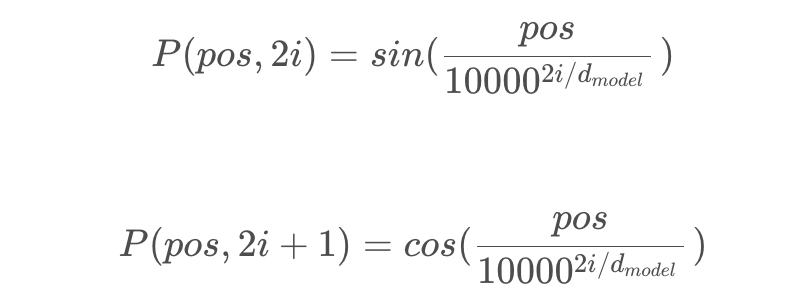

In [36]:
from IPython.display import (Image) 
Image(filename="图片1.png",width=400,height=400)

In [37]:
X.T

,0,1,2,3,4,5,6,7,8,9
我,-1.324775,-1.668875,0.749357,0.859416,-0.226342,-1.670868,0.034034,1.376507,0.642628,1.557622
喜欢,-1.370327,-0.602875,0.274090,-0.380367,-0.497612,0.203198,-0.129605,0.064625,-0.420950,-1.204177
的,0.341538,0.600030,-1.723902,-0.728517,1.158524,-0.858372,1.263434,1.010932,-1.289856,-0.743657
水果,-0.558530,-0.200320,-0.024200,-0.040102,-1.301574,-1.320408,-0.786152,0.636234,-0.444866,-0.212000
是,-0.627179,-1.698853,0.144489,2.466194,-0.099349,-0.376032,2.619675,0.551595,-0.421074,1.006839
橙子,1.078435,-0.732497,0.591076,-0.209849,-0.071781,1.719593,-0.295367,-0.154403,0.773509,-1.587893
和,0.322416,2.647843,2.612501,0.236240,0.500240,0.762496,3.632153,1.523306,0.669406,2.868554
苹果,0.628400,-0.493155,1.145407,-0.822133,-0.707903,-0.963297,0.743129,0.423888,-0.995425,0.157017


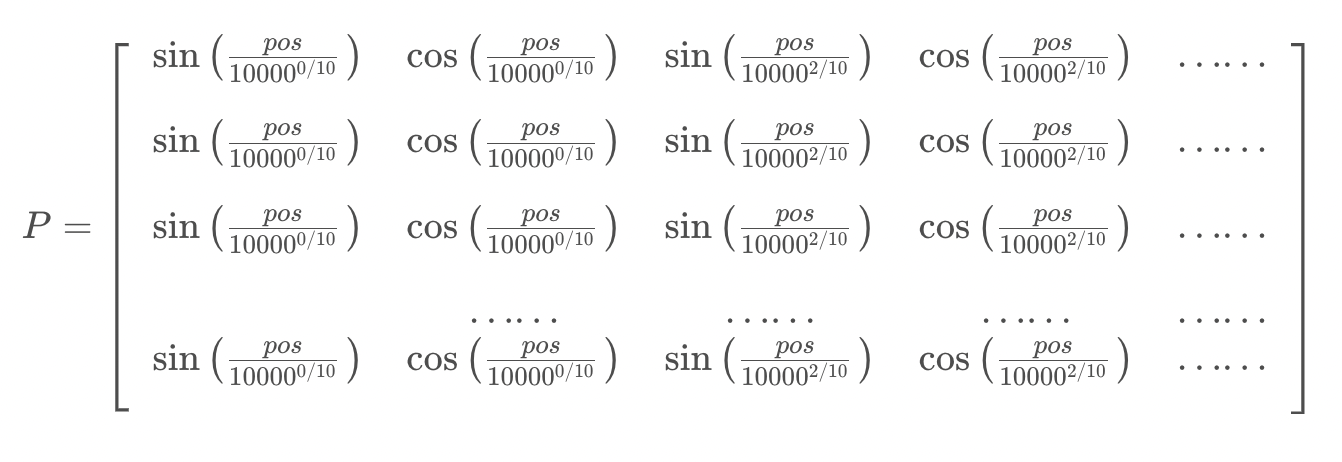

In [38]:
from IPython.display import (Image)
Image(filename="sin.png",width=400,height=400)

In [82]:
pos ,d_model= 8, 10
pos_encoding = np.zeros((pos, d_model))
pos_encoding

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

In [44]:
# 获取位置索引，并扩展维度以进行计算
position = np.arange(pos)[:, np.newaxis]
print(position)

[[0]
 [1]
 [2]
 [3]
 [4]
 [5]
 [6]
 [7]]


In [83]:
np.arange(pos)

array([0, 1, 2, 3, 4, 5, 6, 7])

In [45]:
# 计算分母中的项
div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
div_term

array([1.00000000e+00, 1.58489319e-01, 2.51188643e-02, 3.98107171e-03,
       6.30957344e-04])

In [84]:
1/np.power(10000,0.2)  

0.15848931924611132

In [52]:
# 将正弦应用于偶数索引
pos_encoding[:, 0::2] = np.sin(position * div_term)
pos_encoding

array([[ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00],
       [ 8.41470985e-01,  0.00000000e+00,  1.57826640e-01,
         0.00000000e+00,  2.51162229e-02,  0.00000000e+00,
         3.98106119e-03,  0.00000000e+00,  6.30957303e-04,
         0.00000000e+00],
       [ 9.09297427e-01,  0.00000000e+00,  3.11697146e-01,
         0.00000000e+00,  5.02165994e-02,  0.00000000e+00,
         7.96205928e-03,  0.00000000e+00,  1.26191435e-03,
         0.00000000e+00],
       [ 1.41120008e-01,  0.00000000e+00,  4.57754548e-01,
         0.00000000e+00,  7.52852930e-02,  0.00000000e+00,
         1.19429312e-02,  0.00000000e+00,  1.89287090e-03,
         0.00000000e+00],
       [-7.56802495e-01,  0.00000000e+00,  5.92337725e-01,
         0.00000000e+00,  1.00306487e-01,  0.00000000e+00,
         1.59236138e-02,  0.00000000e+00,  2.52382670e-03,
         0.

In [53]:
# 将余弦应用于奇数索引
pos_encoding[:, 1::2] = np.cos(position * div_term)

In [54]:
pos_encoding

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         1.00000000e+00],
       [ 8.41470985e-01,  5.40302306e-01,  1.57826640e-01,
         9.87466836e-01,  2.51162229e-02,  9.99684538e-01,
         3.98106119e-03,  9.99992076e-01,  6.30957303e-04,
         9.99999801e-01],
       [ 9.09297427e-01, -4.16146837e-01,  3.11697146e-01,
         9.50181503e-01,  5.02165994e-02,  9.98738351e-01,
         7.96205928e-03,  9.99968302e-01,  1.26191435e-03,
         9.99999204e-01],
       [ 1.41120008e-01, -9.89992497e-01,  4.57754548e-01,
         8.89078609e-01,  7.52852930e-02,  9.97162035e-01,
         1.19429312e-02,  9.99928681e-01,  1.89287090e-03,
         9.99998209e-01],
       [-7.56802495e-01, -6.53643621e-01,  5.92337725e-01,
         8.05689779e-01,  1.00306487e-01,  9.94956586e-01,
         1.59236138e-02,  9.99873211e-01,  2.52382670e-03,
         9.

In [55]:
import numpy as np
import matplotlib.pyplot as plt

def positional_encoding(pos, d_model):
    """
    生成位置编码
    :param pos: 位置序号 (序列长度)
    :param d_model: 模型的维度
    :return: 位置编码矩阵 (pos, d_model)
    """
    # 初始化位置编码矩阵
    pos_encoding = np.zeros((pos, d_model))
    # 获取位置索引，并扩展维度以进行计算
    position = np.arange(pos)[:, np.newaxis]
    # 计算分母中的项
    div_term = np.exp(np.arange(0, d_model, 2) * -(np.log(10000.0) / d_model))
    # 将正弦应用于偶数索引
    pos_encoding[:, 0::2] = np.sin(position * div_term)
    # 将余弦应用于奇数索引
    pos_encoding[:, 1::2] = np.cos(position * div_term)

    return pos_encoding



In [57]:
# 设置位置序号和模型的维度
pos = 100  # 序列长度
d_model = 16  # 模型的维度

# 生成位置编码
pos_encoding = positional_encoding(pos, d_model)

In [59]:
pos_encoding

array([[ 0.00000000e+00,  1.00000000e+00,  0.00000000e+00, ...,
         1.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 8.41470985e-01,  5.40302306e-01,  3.10983593e-01, ...,
         9.99999500e-01,  3.16227761e-04,  9.99999950e-01],
       [ 9.09297427e-01, -4.16146837e-01,  5.91127117e-01, ...,
         9.99998000e-01,  6.32455490e-04,  9.99999800e-01],
       ...,
       [ 3.79607739e-01, -9.25147537e-01, -6.75640562e-01, ...,
         9.95299188e-01,  3.06692833e-02,  9.99529587e-01],
       [-5.73381872e-01, -8.19288245e-01, -4.12872309e-01, ...,
         9.95201842e-01,  3.09853608e-02,  9.99519838e-01],
       [-9.99206834e-01,  3.98208804e-02, -1.09159741e-01, ...,
         9.95103501e-01,  3.13014352e-02,  9.99509990e-01]])

In [79]:
pos_encoding[:,2]

array([ 0.        ,  0.31098359,  0.59112712,  0.8126489 ,  0.95358074,
        0.99994652,  0.94714816,  0.80042165,  0.57431777,  0.29125912,
       -0.02068353, -0.33057501, -0.60768355, -0.82452845, -0.95960533,
       -0.99951869, -0.94031033, -0.78785193, -0.5572627 , -0.27141003,
        0.04135821,  0.35002499,  0.62397998,  0.83605523,  0.96521935,
        0.99866321,  0.93307019,  0.77494513,  0.5399692 ,  0.25144482,
       -0.0620152 , -0.36932521, -0.64000944, -0.8472243 , -0.97042039,
       -0.99738044, -0.92543083, -0.76170677, -0.52244467, -0.23137202,
        0.08264565,  0.38846741,  0.65576507,  0.85803087,  0.97520624,
        0.99567095,  0.91739553,  0.74814251,  0.50469661,  0.21120024,
       -0.10324075, -0.4074434 , -0.67124013, -0.86847034, -0.97957484,
       -0.99353545, -0.90896771, -0.73425815, -0.48673262, -0.19093809,
        0.12379167,  0.42624507,  0.68642799,  0.87853823,  0.98352433,
        0.99097487,  0.90015098,  0.72005963,  0.46856037,  0.17

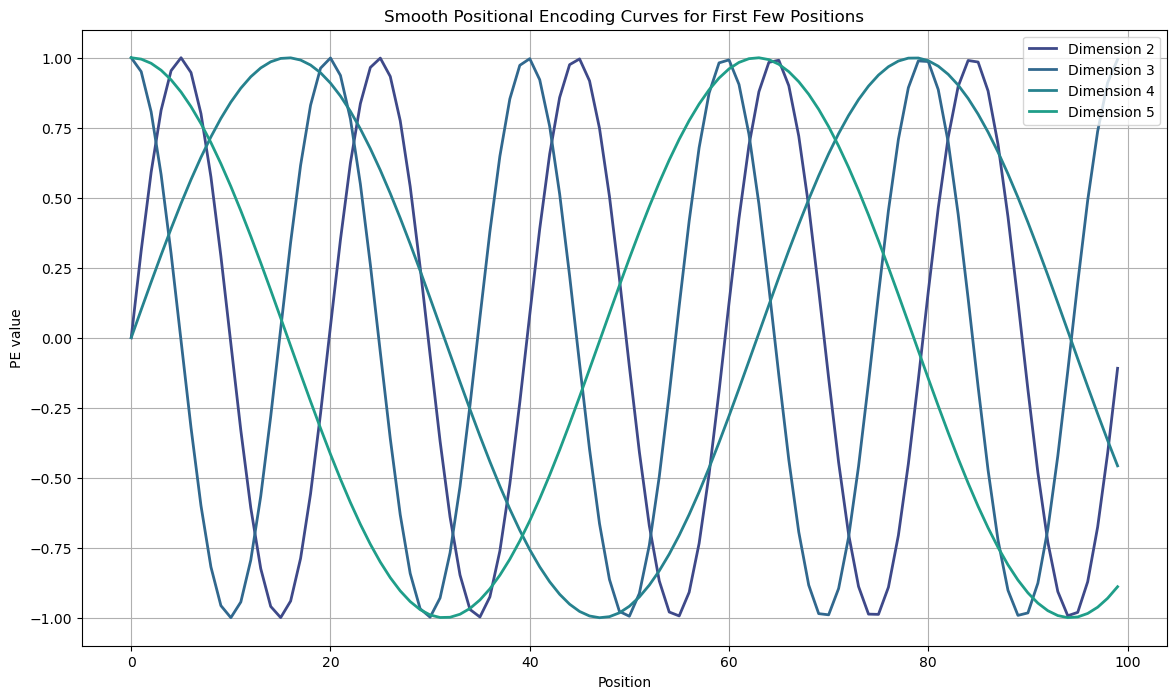

In [77]:
# 使用更圆滑的线条和不同的颜色绘制位置编码曲线图
plt.figure(figsize=(14, 8))
colors = plt.cm.viridis(np.linspace(0, 1, min(pos, 10)))
for i in range(2,min(pos, 6)):  # 只展示前10个位置的编码
    plt.plot(pos_encoding[:,i], label=f'Dimension {i}', color=colors[i], linewidth=2, linestyle='-', marker='', markersize=6)
plt.xlabel('Position')
plt.ylabel('PE value')
plt.title('Smooth Positional Encoding Curves for First Few Positions')
plt.legend()
plt.grid(True)
plt.show()


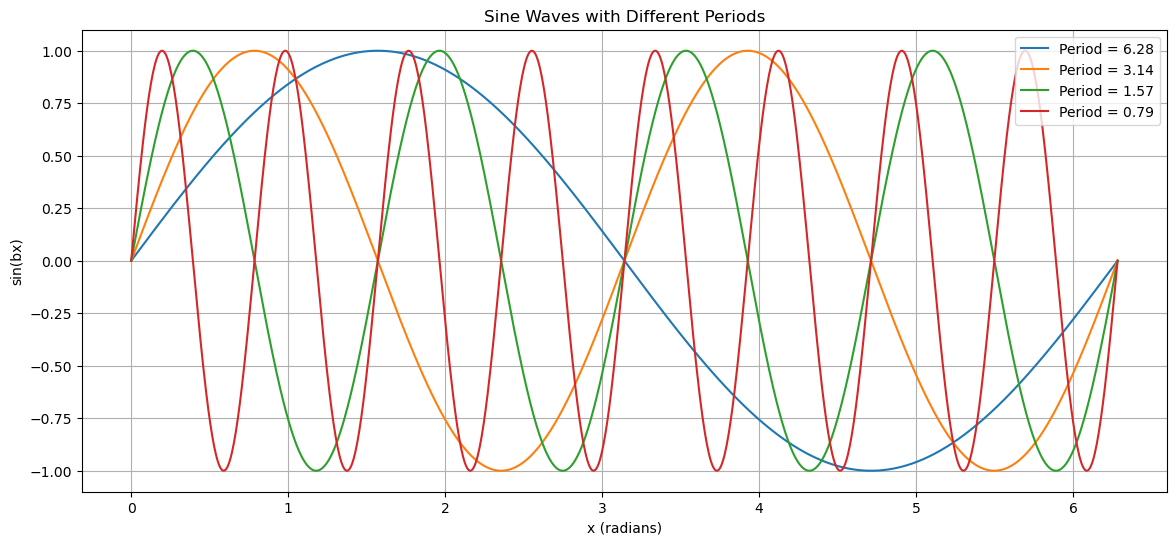

In [62]:
# 设置画布大小
plt.figure(figsize=(14, 6))

# 设置不同的周期参数 b
periods = [1, 2, 4, 8]
x = np.linspace(0, 2*np.pi, 1000)  # 从0到2pi生成1000个点

# 对于每个不同的周期参数 b，绘制一个正弦曲线
for b in periods:
    y = np.sin(b * x)
    plt.plot(x, y, label=f'Period = {2*np.pi/b:.2f}')

# 添加图例
plt.legend()
plt.title('Sine Waves with Different Periods')
plt.xlabel('x (radians)')
plt.ylabel('sin(bx)')
plt.grid(True)
plt.show()


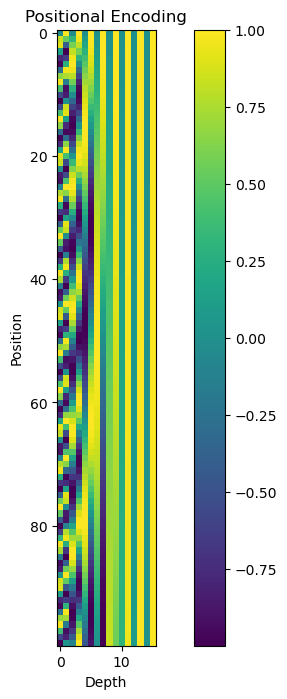

In [56]:



# 绘制位置编码图形
plt.figure(figsize=(10, 8))
plt.imshow(pos_encoding, cmap='viridis')
plt.colorbar()
plt.xlabel('Depth')
plt.ylabel('Position')
plt.title('Positional Encoding')
plt.grid(False)
plt.show()

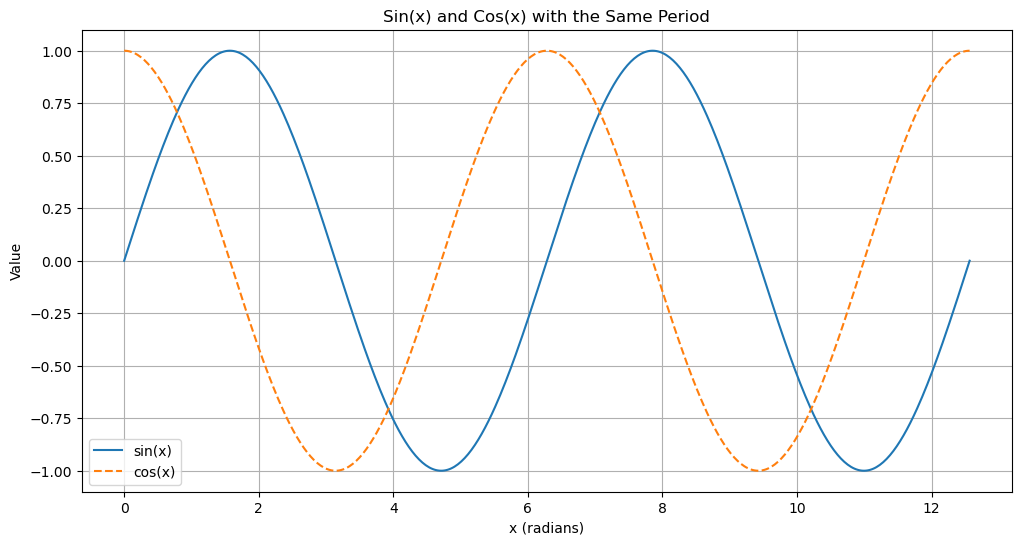

In [80]:
# Define the x range for the plot
x_values = np.linspace(0, 4 * np.pi, 500)  # 4 periods

# Calculate the y values for sin and cos functions
sin_values = np.sin(x_values)
cos_values = np.cos(x_values)

# Plotting sin(x) and cos(x)
plt.figure(figsize=(12, 6))
plt.plot(x_values, sin_values, label='sin(x)')
plt.plot(x_values, cos_values, label='cos(x)', linestyle='--')

# Adding titles and labels
plt.title('Sin(x) and Cos(x) with the Same Period')
plt.xlabel('x (radians)')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.show()
